In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("/content/drive/MyDrive/manish/train.csv (1)/train_detail.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.head()

,Unnamed: 0,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,device.browserSize,device.operatingSystem,device.operatingSystemVersion,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.flashVersion,device.language,device.screenColors,device.screenResolution,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.cityId,geoNetwork.networkDomain,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,totals.hits,totals.pageviews,totals.bounces,totals.newVisits,totals.transactionRevenue,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.keyword,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.isTrueDirect,trafficSource.referralPath,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adContent,trafficSource.campaignCode
0,0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Asia,Western Asia,Turkey,Izmir,(not set),Izmir,not available in demo dataset,ttnet.com.tr,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1.0,1.0,1.0,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Oceania,Australasia,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1.0,1.0,1.0,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Europe,Southern Europe,Spain,Community of Madrid,(not set),Madrid,not available in demo dataset,unknown.unknown,not available in demo dataset,not available in demo dataset,not available in demo dataset,1,1,1.0,1.0,1.0,NaN,(not set),google,organic,(not provided),not available in demo dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,not available in demo dataset,Linux,not av

In [4]:
data.drop("Unnamed: 0",inplace=True,axis=1)

In [5]:
data.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'sessionId',
       'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime',
       'device.browser', 'device.browserVersion', 'device.browserSize',
       'device.operatingSystem', 'device.operatingSystemVersion',
       'device.isMobile', 'device.mobileDeviceBranding',
       'device.mobileDeviceModel', 'device.mobileInputSelector',
       'device.mobileDeviceInfo', 'device.mobileDeviceMarketingName',
       'device.flashVersion', 'device.language', 'device.screenColors',
       'device.screenResolution', 'device.deviceCategory',
       'geoNetwork.continent', 'geoNetwork.subContinent', 'geoNetwork.country',
       'geoNetwork.region', 'geoNetwork.metro', 'geoNetwork.city',
       'geoNetwork.cityId', 'geoNetwork.networkDomain', 'geoNetwork.latitude',
       'geoNetwork.longitude', 'geoNetwork.networkLocation', 'totals.visits',
       'totals.hits', 'totals.pageviews', 'totals.bounces', 'totals.newVisits',
       'totals.t

In [6]:
data.isnull().sum()

channelGrouping                                           0
date                                                      0
fullVisitorId                                             0
sessionId                                                 0
socialEngagementType                                      0
visitId                                                   0
visitNumber                                               0
visitStartTime                                            0
device.browser                                            0
device.browserVersion                                     0
device.browserSize                                        0
device.operatingSystem                                    0
device.operatingSystemVersion                             0
device.isMobile                                           0
device.mobileDeviceBranding                               0
device.mobileDeviceModel                                  0
device.mobileInputSelector              

In [7]:
col_drop = ["trafficSource.campaignCode","trafficSource.adContent","trafficSource.adwordsClickInfo.isVideoAd","trafficSource.adwordsClickInfo.adNetworkType","trafficSource.adwordsClickInfo.gclId","trafficSource.adwordsClickInfo.slot","trafficSource.adwordsClickInfo.page","trafficSource.referralPath","trafficSource.isTrueDirect","trafficSource.keyword","totals.newVisits","totals.bounces"]

In [8]:
data.drop(col_drop,inplace=True,axis=1)

In [9]:
data.shape

(903653, 43)

In [10]:
data.isnull().sum()

channelGrouping                                           0
date                                                      0
fullVisitorId                                             0
sessionId                                                 0
socialEngagementType                                      0
visitId                                                   0
visitNumber                                               0
visitStartTime                                            0
device.browser                                            0
device.browserVersion                                     0
device.browserSize                                        0
device.operatingSystem                                    0
device.operatingSystemVersion                             0
device.isMobile                                           0
device.mobileDeviceBranding                               0
device.mobileDeviceModel                                  0
device.mobileInputSelector              

In [11]:
revenue_generated = data.dropna(axis=0)

In [36]:
revenue_generated

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserVersion,device.browserSize,device.operatingSystem,device.operatingSystemVersion,device.isMobile,device.mobileDeviceBranding,device.mobileDeviceModel,device.mobileInputSelector,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.flashVersion,device.language,device.screenColors,device.screenResolution,device.deviceCategory,geoNetwork.continent,geoNetwork.subContinent,geoNetwork.country,geoNetwork.region,geoNetwork.metro,geoNetwork.city,geoNetwork.cityId,geoNetwork.networkDomain,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.networkLocation,totals.visits,totals.hits,totals.pageviews,totals.transactionRevenue,trafficSource.campaign,trafficSource.source,trafficSource.medium,trafficSource.adwordsClickInfo.criteriaParameters
752,Direct,20160902,6194193421514403509,6194193421514403509_1472843572,Not Socially Engaged,1472843572,1,1472843572,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,Michigan,Detroit MI,Ann Arbor,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,11,11.0,25.174171,(not set),(direct),(none),not available in demo dataset
753,Organic Search,20160902,5327166854580374902,5327166854580374902_1472844906,Not Socially Engaged,1472844906,3,1472844906,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,11,10.0,28.192112,(not set),google,organic,not available in demo dataset
799,Referral,20160902,8885051388942907862,8885051388942907862_1472827393,Not Socially Engaged,1472827393,7,1472827393,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,New York,New York NY,New York,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,13,11.0,26.019668,(not set),mall.googleplex.com,referral,not available in demo dataset
802,Referral,20160902,185467632009737931,0185467632009737931_1472846398,Not Socially Engaged,1472846398,6,1472846398,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop,Americas,Northern America,United States,California,San Francisco-Oakland-San Jose CA,Mountain View,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,not available in demo dataset,1,13,12.0,24.645814,(not s

In [13]:
revenue_not_generated = data[data["totals.transactionRevenue"].isnull()]

In [14]:
revenue_not_generated.shape

(892138, 43)

In [15]:
revenue_generated['totals.transactionRevenue'] = revenue_generated['totals.transactionRevenue'].astype(int)
revenue_generated['totals.transactionRevenue'] = np.log2(revenue_generated['totals.transactionRevenue'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Text(0.5, 0, 'Revenue')

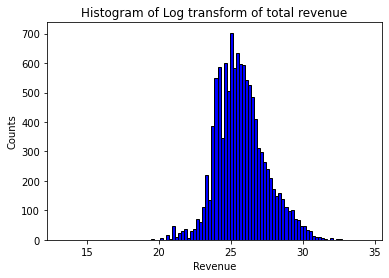

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
plt.hist(revenue_generated['totals.transactionRevenue'], color = 'blue', edgecolor = 'black',
         bins = int(100))


plt.title('Histogram of Log transform of total revenue')
plt.ylabel('Counts')
plt.xlabel('Revenue')

Text(0.5, 0, 'deviceCategory')

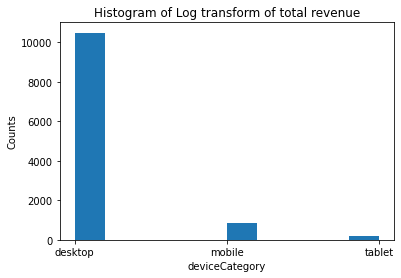

In [66]:
# matplotlib histogram
plt.hist(revenue_generated["device.deviceCategory"])


plt.title('Histogram of Log transform of total revenue')
plt.ylabel('Counts')
plt.xlabel('deviceCategory')


Text(0.5, 0, 'device_Category')

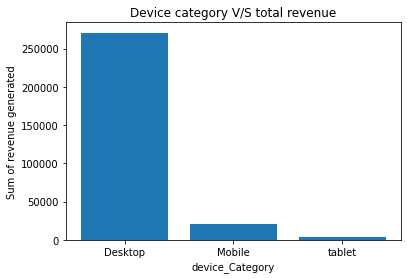

In [71]:
# matplotlib histogram
category = ["Desktop","Mobile","tablet"]
plt.bar(category,revenue_generated.groupby(["device.deviceCategory"]).sum()["totals.transactionRevenue"].values)


plt.title('Device category V/S total revenue')
plt.ylabel('Sum of revenue generated')
plt.xlabel('device_Category')


Text(0.5, 0, 'Browser')

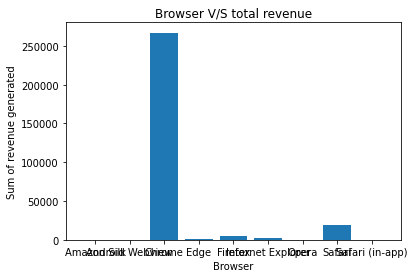

In [74]:
# print(revenue_generated["device.browser"].unique())
browser = ['Amazon Silk','Android Webview','Chrome',"Edge","Firefox","Internet Explorer","Opera","Safari","Safari (in-app)"]
values = revenue_generated.groupby(["device.browser"]).mean()["totals.transactionRevenue"].values

# matplotlib histogram

plt.bar(browser,values)


plt.title('Browser V/S total revenue')
plt.ylabel('Sum of revenue generated')
plt.xlabel('Browser')

Text(0.5, 0, 'geo Network')

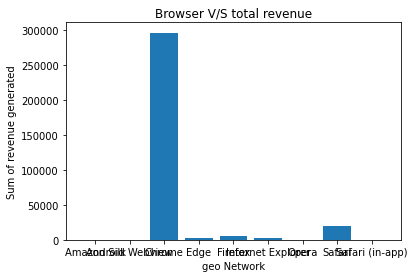

In [43]:
browser = dict(revenue_generated.groupby(["device.browser"]).sum()["totals.pageviews"])
browser.keys(),browser.values()
plt.bar(browser.keys(),browser.values())
plt.title('Browser V/S total revenue')
plt.ylabel('Sum of revenue generated')
plt.xlabel('geo Network')

Text(0.5, 0, 'geo Network')

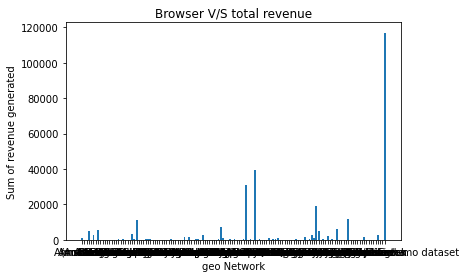

In [23]:
geonetwork = dict(revenue_generated.groupby(["geoNetwork.city"]).sum()["totals.transactionRevenue"])
geonetwork.keys(),geonetwork.values()
plt.bar(geonetwork.keys(),geonetwork.values())
plt.title('Browser V/S total revenue')
plt.ylabel('Sum of revenue generated')
plt.xlabel('geo Network')

Text(0.5, 0, 'geo Network')

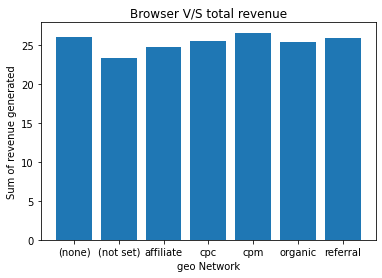

In [32]:
medium = dict(revenue_generated.groupby(["trafficSource.medium"]).mean()["totals.transactionRevenue"])
medium.keys(),medium.values()
plt.bar(medium.keys(),medium.values())
plt.title('Browser V/S total revenue')
plt.ylabel('Sum of revenue generated')
plt.xlabel('geo Network')
# medium

Text(0.5, 0, 'geo Network')

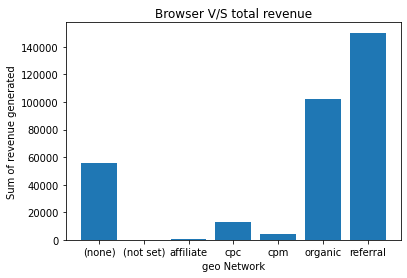

In [31]:
pviews = dict(revenue_generated.groupby(["trafficSource.medium"]).sum()["totals.pageviews"])
pviews.keys(),pviews.values()
plt.bar(pviews.keys(),pviews.values())
plt.title('Browser V/S total revenue')
plt.ylabel('Sum of revenue generated')
plt.xlabel('geo Network')

In [30]:
# pviews

{'(none)': 27.47845249755142,
 '(not set)': 16.0,
 'affiliate': 28.0,
 'cpc': 28.200854700854702,
 'cpm': 28.887323943661972,
 'organic': 29.732693426410705,
 'referral': 27.760849492151433}

{'(Other)': 16.0,
 'Affiliates': 252.0,
 'Direct': 56111.0,
 'Display': 4102.0,
 'Organic Search': 102221.0,
 'Paid Search': 13198.0,
 'Referral': 146830.0,
 'Social': 3495.0}

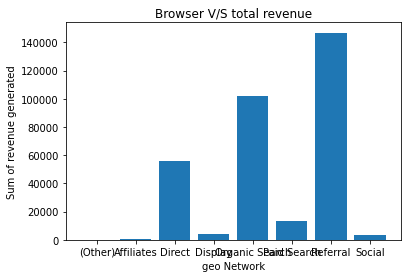

In [38]:

channelGrouping = dict(revenue_generated.groupby(["channelGrouping"]).sum()["totals.pageviews"])

channelGrouping.keys(),channelGrouping.values()
plt.bar(channelGrouping.keys(),channelGrouping.values())
plt.title('Browser V/S total revenue')
plt.ylabel('Sum of revenue generated')
plt.xlabel('geo Network')
channelGrouping

{'(Other)': 23.252053247341866,
 'Affiliates': 24.73057743342535,
 'Direct': 26.01740552902595,
 'Display': 26.53556172165178,
 'Organic Search': 25.357464261949143,
 'Paid Search': 25.415045742175522,
 'Referral': 25.8473619379801,
 'Social': 25.029049308366424}

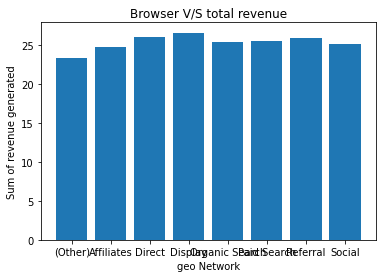

In [39]:
channelGrouping = dict(revenue_generated.groupby(["channelGrouping"]).mean()["totals.transactionRevenue"])

channelGrouping.keys(),channelGrouping.values()
plt.bar(channelGrouping.keys(),channelGrouping.values())
plt.title('Browser V/S total revenue')
plt.ylabel('Sum of revenue generated')
plt.xlabel('geo Network')
channelGrouping

Text(0.5, 0, 'geo Network')

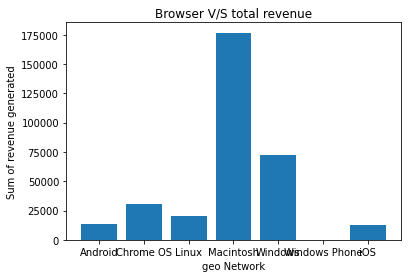

In [41]:
operatingsystem = dict(revenue_generated.groupby(["device.operatingSystem"]).sum()["totals.pageviews"])
operatingsystem.keys(),operatingsystem.values()
plt.bar(operatingsystem.keys(),operatingsystem.values())
plt.title('Browser V/S total revenue')
plt.ylabel('Sum of revenue generated')
plt.xlabel('geo Network')

Text(0.5, 0, 'geo Network')

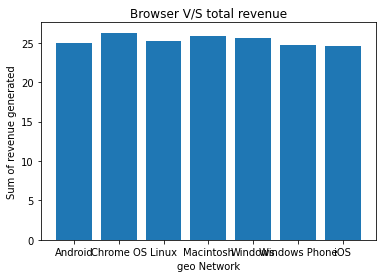

In [42]:
operatingsystem = dict(revenue_generated.groupby(["device.operatingSystem"]).mean()["totals.transactionRevenue"])
operatingsystem.keys(),operatingsystem.values()
plt.bar(operatingsystem.keys(),operatingsystem.values())
plt.title('Browser V/S total revenue')
plt.ylabel('Sum of revenue generated')
plt.xlabel('geo Network')

socialEngagementType
Not Socially Engaged    1.540071e+12
Name: totals.transactionRevenue, dtype: float64

device.operatingSystem
Android          3.634128e+10
Chrome OS        1.839378e+11
Linux            4.391040e+10
Macintosh        8.563758e+11
Windows          3.973127e+11
Windows Phone    2.640000e+07
iOS              2.216690e+10
Name: totals.transactionRevenue, dtype: float64

device.mobileDeviceBranding
not available in demo dataset    1.540071e+12
Name: totals.transactionRevenue, dtype: float64